# K-means Clustering Implementation

This notebook implements the K-means clustering algorithm from scratch using Python. The implementation includes:

1. Data visualization using matplotlib
2. K-means clustering algorithm implementation
3. Interactive visualization of cluster formation
4. Support for n-dimensional datasets

## Algorithm Overview

K-means clustering is an unsupervised learning algorithm that groups similar data points into K clusters. The algorithm works by:
1. Randomly initializing K cluster centers
2. Assigning each data point to the nearest cluster center
3. Updating cluster centers by calculating the mean of all points in each cluster
4. Repeating steps 2-3 until convergence or maximum iterations reached

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from typing import List, Tuple
import copy

In [ ]:
class KMeans:
    def __init__(self, n_clusters: int, max_iters: int = 100, random_state: int = None):
        """
        Initialize KMeans clustering algorithm
        
        Args:
            n_clusters (int): Number of clusters (K)
            max_iters (int): Maximum number of iterations for convergence
            random_state (int): Random seed for reproducibility
        """
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.iteration_history = []
        
    def euclidean_distance(self, X1: np.ndarray, X2: np.ndarray) -> np.ndarray:
        """
        Calculate Euclidean distance between points
        
        Args:
            X1: Array of points of shape (n_samples, n_features)
            X2: Array of points of shape (n_centers, n_features)
            
        Returns:
            Distances matrix of shape (n_samples, n_centers)
        """
        return np.sqrt(((X1[:, np.newaxis] - X2) ** 2).sum(axis=2))
    
    def initialize_centroids(self, X: np.ndarray) -> np.ndarray:
        """
        Initialize K centroids randomly
        
        Args:
            X: Input data of shape (n_samples, n_features)
            
        Returns:
            Initial centroids of shape (n_clusters, n_features)
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        n_samples, n_features = X.shape
        centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        return centroids
    
    def assign_clusters(self, X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        """
        Assign each point to nearest centroid
        
        Args:
            X: Input data of shape (n_samples, n_features)
            centroids: Current centroids of shape (n_clusters, n_features)
            
        Returns:
            Cluster labels for each point
        """
        distances = self.euclidean_distance(X, centroids)
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, X: np.ndarray, labels: np.ndarray) -> np.ndarray:
        """
        Update centroids based on mean of points in each cluster
        
        Args:
            X: Input data of shape (n_samples, n_features)
            labels: Cluster labels for each point
            
        Returns:
            Updated centroids
        """
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids
    
    def fit(self, X: np.ndarray) -> 'KMeans':
        """
        Fit KMeans clustering to the data
        
        Args:
            X: Input data of shape (n_samples, n_features)
            
        Returns:
            self: Fitted KMeans instance
        """
        # Initialize centroids
        self.centroids = self.initialize_centroids(X)
        self.iteration_history = [(copy.deepcopy(self.centroids), None)]
        
        # Iterate until convergence or max iterations
        for i in range(self.max_iters):
            # Assign clusters
            labels = self.assign_clusters(X, self.centroids)
            self.iteration_history[-1] = (self.iteration_history[-1][0], labels)
            
            # Update centroids
            new_centroids = self.update_centroids(X, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids
            self.iteration_history.append((copy.deepcopy(self.centroids), None))
        
        self.labels = labels
        return self

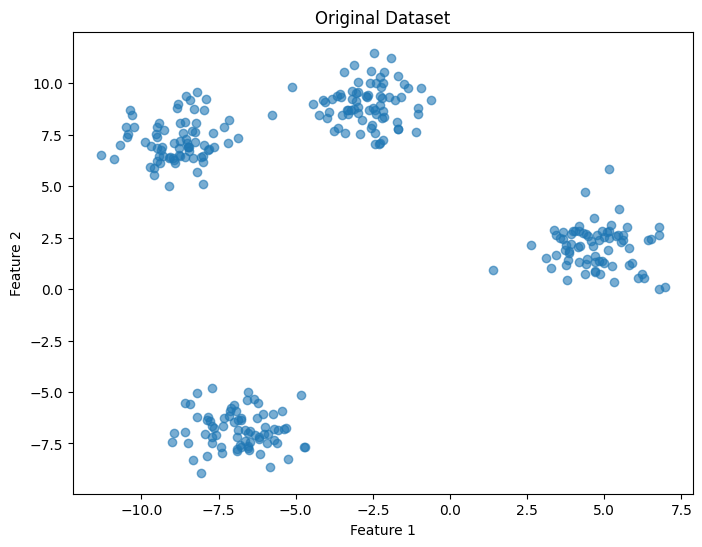

In [4]:
def visualize_clusters(X: np.ndarray, 
                      centroids: np.ndarray = None, 
                      labels: np.ndarray = None,
                      title: str = "Data Visualization") -> None:
    """
    Visualize data points and optionally show clusters and centroids
    
    Args:
        X: Input data of shape (n_samples, n_features)
        centroids: Cluster centroids (optional)
        labels: Cluster labels (optional)
        title: Plot title
    """
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    if labels is not None:
        scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter)
    else:
        plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
    
    # Plot centroids
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                   c='red', marker='x', s=200, linewidths=3, 
                   label='Centroids')
        plt.legend()
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Generate sample dataset
np.random.seed(42)
X, true_labels = make_blobs(n_samples=300, 
                          centers=4, 
                          cluster_std=1.0, 
                          random_state=42)

# Visualize the original dataset
visualize_clusters(X, title="Original Dataset")

Visualizing K-means clustering iterations:


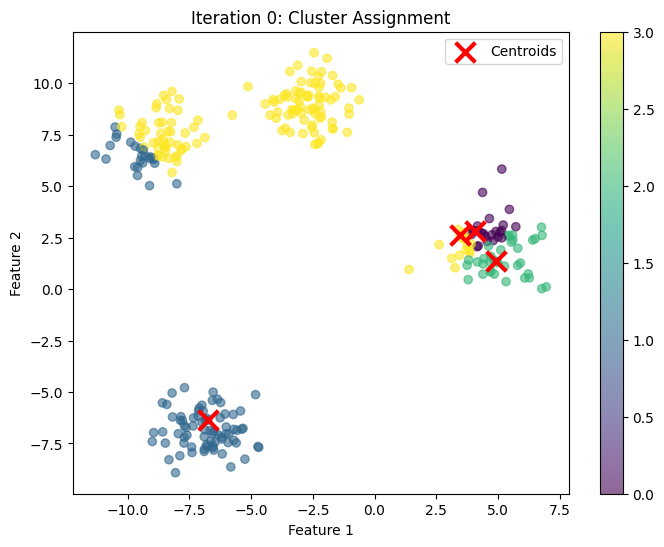

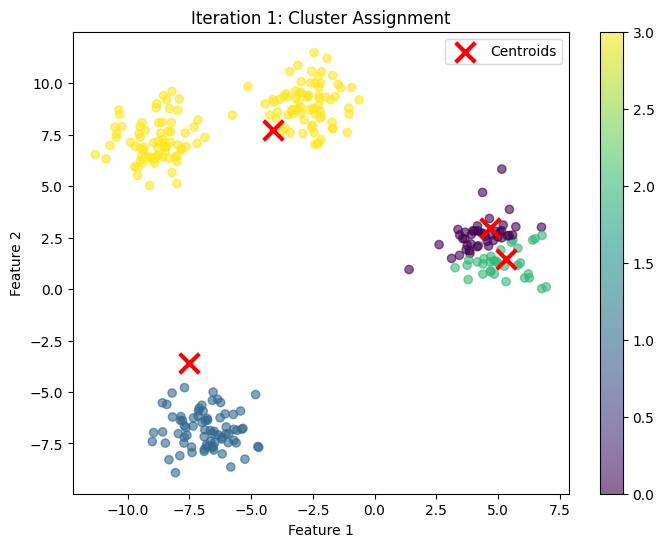

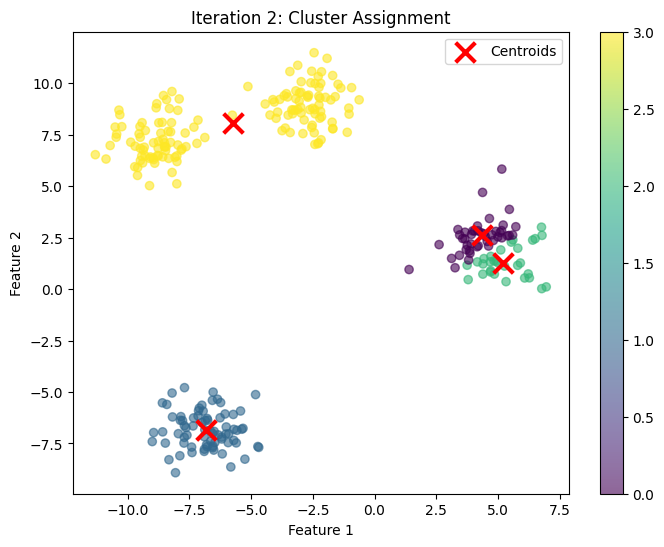

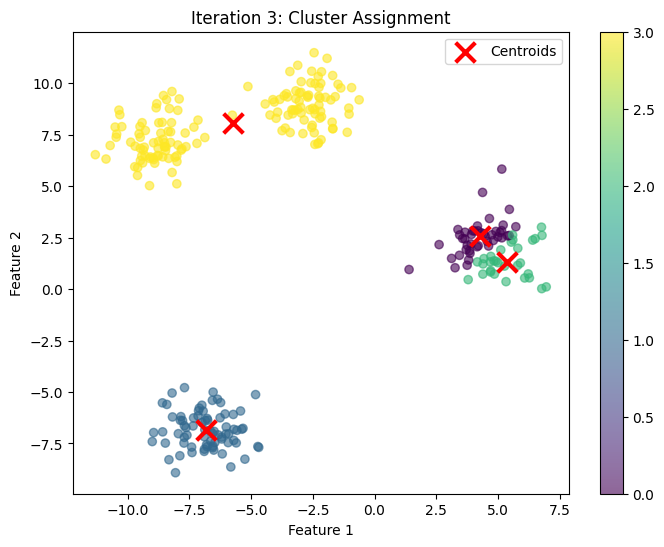

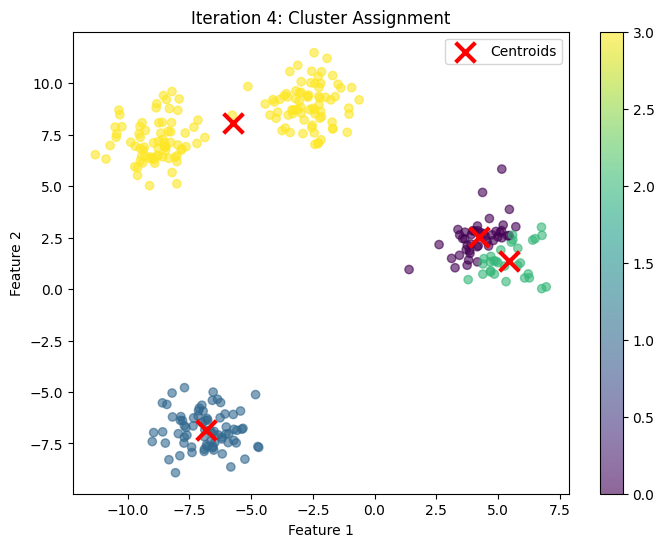

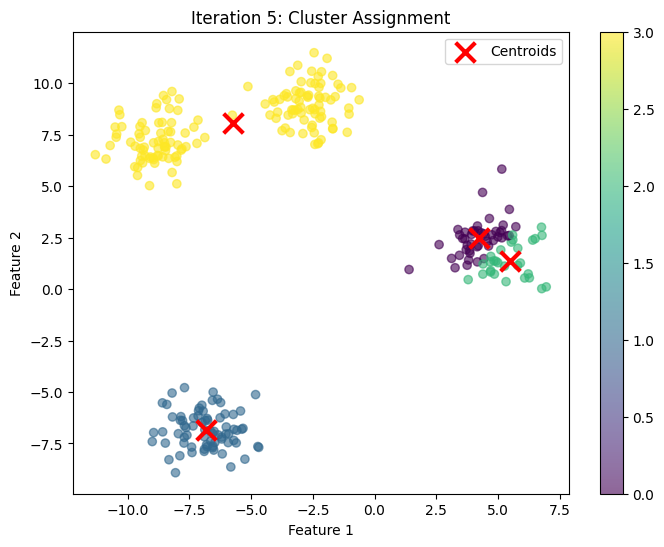

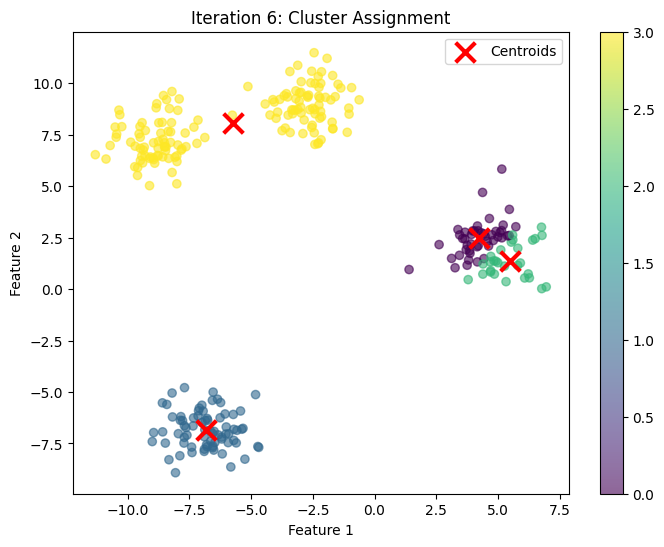

In [5]:
# Initialize and fit KMeans
kmeans = KMeans(n_clusters=4, max_iters=100, random_state=42)
kmeans.fit(X)

# Visualize clustering iterations
print("Visualizing K-means clustering iterations:")
for i, (centroids, labels) in enumerate(kmeans.iteration_history):
    if labels is None:
        title = f"Iteration {i}: Initial Centroids"
    else:
        title = f"Iteration {i}: Cluster Assignment"
    visualize_clusters(X, centroids, labels, title=title)

## Using the Implementation

This implementation of K-means clustering can be used with any n-dimensional dataset. Here's how to use it:

1. **Prepare your data**: Ensure your data is in the form of a numpy array with shape (n_samples, n_features)

2. **Initialize the KMeans class**:
   ```python
   kmeans = KMeans(n_clusters=k, max_iters=100, random_state=42)
   ```
   - `n_clusters`: number of clusters (K)
   - `max_iters`: maximum iterations for convergence
   - `random_state`: seed for reproducibility

3. **Fit the model**:
   ```python
   kmeans.fit(X)
   ```

4. **Access results**:
   - `kmeans.centroids`: Final cluster centers
   - `kmeans.labels`: Cluster assignments for each point
   - `kmeans.iteration_history`: History of centroids and labels for visualization

5. **Visualize results**: Use the `visualize_clusters()` function to plot the results

Note: For high-dimensional data (>2D), you'll need to modify the visualization function or use dimensionality reduction techniques like PCA before visualization.